# Steps of clustering research

In [1]:
#enable autocomplete
%config IPCompleter.greedy=True 

#load packages
import sys #access to system parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target

x.shape

(150, 4)

# Hierarchical Clustering

## Hierarchical Clustering - scaling

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
pca_scaler = PCA(n_components=4)

standard_scaler.fit(x)
minmax_scaler.fit(x)
pca_scaler.fit(x)

standard_x = standard_scaler.transform(x)
minmax_x = minmax_scaler.transform(x)
pca_x = pca_scaler.transform(x)

## Hierarchical Clustering - dendrogram

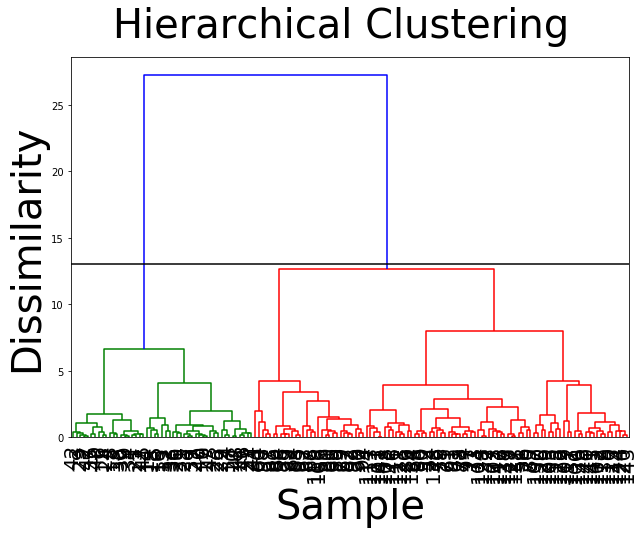

In [65]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from sklearn.cluster import AgglomerativeClustering

linked = linkage(standard_x, 'ward')
max_d = 13

plt.figure(figsize=(10, 7))  
den = dendrogram(linked,orientation='top'
           ,distance_sort='descending'
           ,show_leaf_counts=True,leaf_font_size = 20,color_threshold = max_d,truncate_mode='lastp',p=150)#p=150 , p=5
plt.axhline(y=max_d, c='k')
plt.suptitle("Hierarchical Clustering", fontsize=40)
plt.xlabel("Sample",fontdict={'fontsize': 40})
plt.ylabel("Dissimilarity",fontdict={'fontsize': 40})
plt.show()  

In [66]:
den.keys()#dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list'])
len(den['ivl'])
#den['ivl']
#den['leaves']

150

In [67]:
from scipy.cluster.hierarchy import fcluster

assignments = fcluster(linked,max_d,'distance')

print(assignments)

assignments_series = pd.Series(assignments)

assignments_series.value_counts()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


2    101
1     49
dtype: int64

## Hierarchical Clustering - dendrogram - Cluster

In [68]:
leaves_dataframe = pd.DataFrame({"leaves":den['leaves']})
assignments_dataframe = pd.DataFrame({"assignments":assignments})

cluster_dataframe = leaves_dataframe.join(assignments_dataframe)

cluster_dataframe.sort_values('assignments',inplace=True)
cluster_dataframe.set_index('leaves',drop = True,inplace=True)

cluster_dataframe

,assignments
leaves,
42,1
36,1
20,1
31,1
28,1
7,1
39,1
27,1
40,1


## Hierarchical Clustering - choose the number of cluster

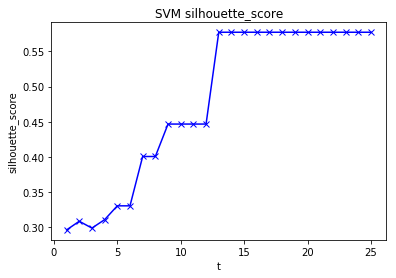

In [69]:
from sklearn.metrics import silhouette_score

silhouette_score_list = []
t_range = np.linspace(1,25,25)

for t_val in t_range:
    
    y_pred = fcluster(linked,t_val,'distance')
    
    if len(np.unique(y_pred)) > 1:
        svm_silhouette_score = silhouette_score(standard_x,y_pred)
        silhouette_score_list.append(svm_silhouette_score)
    else:
        silhouette_score_list.append(-1)
    


plt.plot(t_range, silhouette_score_list, 'bx-')
plt.xlabel('t')
plt.ylabel('silhouette_score')
plt.title('SVM silhouette_score')
plt.show()

## Hierarchical Clustering - make cluster